<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [44]:
# Check keras and tensorflow versions

import tensorflow as tf
from tensorflow import keras

print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)

Keras version:  2.4.0
Tensorflow version:  2.4.1


In [1]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [3]:
# The diabetes dataset
diabetes = load_diabetes()


In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

### Prepare input data

In [5]:
X =diabetes.data

In [6]:
print(type(X))

<class 'numpy.ndarray'>


In [7]:
X.shape

(442, 10)

In [19]:
n_cols=X.shape[1]
n_cols

10

In [10]:
X[:2]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405]])

In [14]:
y= diabetes.target
print(type(y))

<class 'numpy.ndarray'>


In [15]:
y.shape

(442,)

### Split the data (training/test)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [20]:
# Set up the model architecture
model = Sequential()

# Add the first hidden layer
model.add(Dense(15, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(5, activation = 'relu'))
# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                165       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [22]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [24]:
%%time

# shuffle training data
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)


# Fit the model
history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 1000,
    verbose = 0)

CPU times: user 1min 34s, sys: 3.82 s, total: 1min 38s
Wall time: 1min 28s


### Create predictions

In [28]:
predictions = model.predict(X_test)

### Evaluate the model

In [29]:
# Calculate test MSE
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])

5/5 [==============================] - 0s 2ms/step - loss: 3289.6978 - mse: 3289.6978

Test loss: 3289.697754


In [30]:
RMSE= score[0]**(1/2)
RMSE

57.35588682869658

In [33]:
import pandas as pd
df_y = pd.DataFrame(data=y, index=None, columns=["target"])

In [38]:
df_y.describe().T

,count,mean,std,min,25%,50%,75%,max
target,442.0,152.133484,77.093005,25.0,87.0,140.5,211.5,346.0


### Visualisation of cost

In [40]:
history.history

{'loss': [28743.814453125,
  28715.31640625,
  28683.76171875,
  28642.802734375,
  28590.9375,
  28526.63671875,
  28444.671875,
  28347.841796875,
  28232.625,
  28099.302734375,
  27941.9609375,
  27762.60546875,
  27557.29296875,
  27326.427734375,
  27070.01171875,
  26789.3125,
  26476.8515625,
  26138.154296875,
  25768.58203125,
  25363.9765625,
  24930.244140625,
  24471.763671875,
  23981.984375,
  23453.654296875,
  22909.07421875,
  22355.205078125,
  21783.904296875,
  21168.974609375,
  20537.931640625,
  19889.26171875,
  19222.72265625,
  18579.3125,
  17897.416015625,
  17210.3046875,
  16524.857421875,
  15839.494140625,
  15171.96875,
  14503.173828125,
  13815.0283203125,
  13153.3798828125,
  12540.3759765625,
  11919.5283203125,
  11293.2265625,
  10706.4775390625,
  10144.7919921875,
  9601.07421875,
  9087.7998046875,
  8595.3076171875,
  8171.0322265625,
  7765.9052734375,
  7400.9609375,
  7053.396484375,
  6743.3115234375,
  6456.34375,
  6173.47998046875,
  

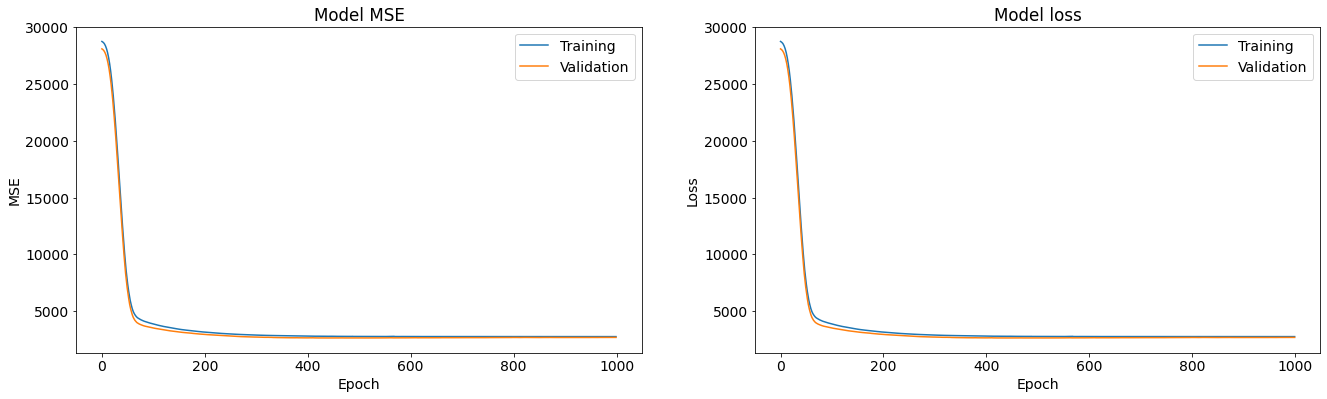

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [42]:
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

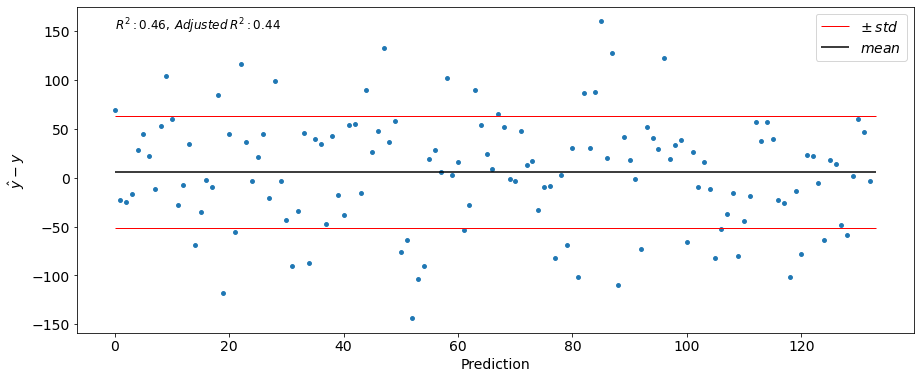

In [43]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



